# Staggered Tidal Scenario Example

In [1]:
%matplotlib inline

Prepare the test data for loading. The files required can be found in the test_data directory of the source code and should be copied to the directory that the notebook is running. When the python file is run a pickle file is generated containing a dictionary of inputs.

In [2]:
%run fixed_tidal_staggered_layout_scenario.py

    Subclass or Group Observed
0           mysticete    False
1           dolphinds    False
2   large odontoncete    False
3         odontoncete    False
4  particular habitat    False
5                fish    False
generate test data: d:\Users\108386\Desktop\notebooks\Meeting Edinburgh - renamed\fixed_tidal_staggered_layout_scenario.pkl


In [3]:
from IPython.display import display, HTML

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14.0, 8.0)

In [5]:
import numpy as np
from datetime import datetime

In [6]:
from dtocean_core import start_logging
from dtocean_core.core import Core
from dtocean_core.menu import DataMenu, ModuleMenu, ProjectMenu, ThemeMenu
from dtocean_core.pipeline import Tree, _get_connector
from dtocean_core.strategy import StrategyManager

In [7]:
# Bring up the logger
start_logging()

2016-09-13 01:16:28,923 - INFO - dtocean_core - Begin logging for dtocean_core.


In [8]:
def html_list(x):
    message = "<ul>"
    for name in x:
        message += "<li>{}</li>".format(name)
    message += "</ul>"
    return message
def html_dict(x):
    message = "<ul>"
    for name, status in x.iteritems():
        message += "<li>{}: <b>{}</b></li>".format(name, status)
    message += "</ul>"
    return message
def html_variable(core, project, variable):
    value = variable.get_value(core, project)
    metadata = variable.get_metadata(core)
    name = metadata.title
    units = metadata.units
    message = "<b>{}:</b> {}".format(name, value)
    if units:
        message += " ({})".format(units[0])
    return message

## Create the core, menus and pipeline tree

The core object carrys all the system information and is operated on by the other classes

In [9]:
new_core = Core()
project_menu = ProjectMenu()
module_menu = ModuleMenu()
theme_menu = ThemeMenu()
data_menu = DataMenu()
pipe_tree = Tree()

## Create a new project and tree

In [10]:
project_title = "DTOcean"  
new_project = project_menu.new_project(new_core, project_title)

2016-09-13 01:16:32,838 - INFO - aneris.entity.simulation - Created new Simulation with title "Default"
2016-09-13 01:16:32,854 - INFO - aneris.control.simulation - Datastate with level "initial" stored
2016-09-13 01:16:32,854 - INFO - aneris.control.pipeline - New Hub created for interface ProjectInterface.


## Set the device type

In [11]:
options_branch = pipe_tree.get_branch(new_core, new_project, "System Type Selection")
variable_id = "device.system_type"
my_var = options_branch.get_input_variable(new_core, new_project, variable_id)
my_var.set_raw_interface(new_core, "Tidal Fixed")
my_var.read(new_core, new_project)

2016-09-13 01:16:32,868 - INFO - aneris.control.data - New "device.system_type" data stored with index WM2FTY
2016-09-13 01:16:32,868 - INFO - aneris.control.simulation - Datastate stored


## Initiate the pipeline
This step will be important when the database is incorporated into the system as it will effect the operation of the pipeline.

In [12]:
project_menu.initiate_pipeline(new_core, new_project)

2016-09-13 01:16:32,884 - INFO - aneris.control.simulation - Datastate with level "system type selection start" stored
2016-09-13 01:16:32,884 - INFO - aneris.control.data - New "hidden.pipeline_active" data stored with index ODKQFP
2016-09-13 01:16:32,884 - INFO - aneris.control.simulation - Datastate with level "system type selection output" stored
2016-09-13 01:16:32,901 - INFO - aneris.control.pipeline - New Pipeline created for interface ModuleInterface.
2016-09-13 01:16:32,901 - INFO - aneris.control.pipeline - New Hub created for interface ThemeInterface.


## Discover available modules

In [13]:
names = module_menu.get_available(new_core, new_project)
message = html_list(names)
HTML(message)

## Activate some modules

Note that the order of activation is important and that we can't deactivate yet!

In [14]:
module_menu.activate(new_core, new_project, 'Hydrodynamics')
module_menu.activate(new_core, new_project, 'Electrical Sub Systems')
module_menu.activate(new_core, new_project, 'Mooring and Foundations')

## Activate the Economics and Environmental themes

In [15]:
names = theme_menu.get_available(new_core, new_project)
message = html_list(names)
HTML(message)

In [16]:
theme_menu.activate(new_core, new_project, "Economics")
theme_menu.activate(new_core, new_project, "Environmental Impact Assessment")

In [17]:
# Here we are expecting Hydrodynamics
assert _get_connector(new_project, "modules").get_current_interface_name(new_core, new_project) == "Hydrodynamics"

## Initiate the dataflow
This indicates that the filtering and module / theme selections are complete

In [18]:
project_menu.initiate_dataflow(new_core, new_project)

2016-09-13 01:16:33,025 - INFO - aneris.control.data - New "hidden.dataflow_active" data stored with index V4KNEC
2016-09-13 01:16:33,025 - INFO - aneris.control.simulation - Datastate stored
2016-09-13 01:16:33,040 - INFO - aneris.control.simulation - Datastate with level "modules initial" stored


## Create the branches assosiated to the modules

In [19]:
hydro_branch = pipe_tree.get_branch(new_core, new_project, "Hydrodynamics")
electro_branch = pipe_tree.get_branch(new_core, new_project, 'Electrical Sub Systems')
moorings_branch = pipe_tree.get_branch(new_core, new_project, 'Mooring and Foundations')
eco_branch = pipe_tree.get_branch(new_core, new_project, "Economics")
env_branch = pipe_tree.get_branch(new_core, new_project, "Environmental Impact Assessment")

## Load test data

In [20]:
hydro_branch.read_test_data(new_core,
                            new_project,
                            "fixed_tidal_staggered_layout_scenario.pkl")

2016-09-13 01:16:34,553 - INFO - aneris.control.data - New "farm.tidal_occurrence_point" data stored with index X0W54Z
2016-09-13 01:16:34,553 - INFO - aneris.control.data - New "device.bidirection" data stored with index G1J53N
2016-09-13 01:16:34,553 - INFO - aneris.control.data - New "farm.tidal_series" data stored with index BBM6P7
2016-09-13 01:16:34,553 - INFO - aneris.control.data - New "device.installation_depth_max" data stored with index JGL2EZ
2016-09-13 01:16:34,553 - INFO - aneris.control.data - New "options.user_array_option" data stored with index PBM2AN
2016-09-13 01:16:34,569 - INFO - aneris.control.data - New "device.coordinate_system" data stored with index 8CM0DQ
2016-09-13 01:16:34,569 - INFO - aneris.control.data - New "device.turbine_diameter" data stored with index G1FLH6
2016-09-13 01:16:34,569 - INFO - aneris.control.data - New "device.minimum_distance_x" data stored with index QKDH6H
2016-09-13 01:16:34,569 - INFO - aneris.control.data - New "device.minimum_d

In [21]:
electro_branch.read_test_data(new_core,
                              new_project,
                              "fixed_tidal_staggered_layout_scenario.pkl")

2016-09-13 01:16:36,082 - INFO - aneris.control.data - New "device.constant_power_factor" data stored with index JD2D94
2016-09-13 01:16:36,082 - INFO - aneris.control.data - New "component.power_quality" data stored with index DEW8H3
2016-09-13 01:16:36,082 - INFO - aneris.control.data - New "corridor.shipping_hist" data stored with index 04WI3M
2016-09-13 01:16:36,082 - INFO - aneris.control.data - New "component.switchgear" data stored with index QRAVSZ
2016-09-13 01:16:36,082 - INFO - aneris.control.data - New "component.collection_points" data stored with index B1FMS4
2016-09-13 01:16:36,098 - INFO - aneris.control.data - New "component.dry_mate_connectors" data stored with index E3T2GY
2016-09-13 01:16:36,098 - INFO - aneris.control.data - New "device.voltage" data stored with index 1CIFR6
2016-09-13 01:16:36,098 - INFO - aneris.control.data - New "farm.shipping_hist" data stored with index V06N7S
2016-09-13 01:16:36,098 - INFO - aneris.control.data - New "corridor.max_seabed_tem

In [22]:
moorings_branch.read_test_data(new_core,
                               new_project,
                               "fixed_tidal_staggered_layout_scenario.pkl")

2016-09-13 01:16:37,658 - INFO - aneris.control.data - New "farm.mean_wind_speed_100_year" data stored with index HACT24
2016-09-13 01:16:37,658 - INFO - aneris.control.data - New "device.system_profile" data stored with index JSMZZ3
2016-09-13 01:16:37,658 - INFO - aneris.control.data - New "farm.wave_gamma_100_year" data stored with index XZSRIQ
2016-09-13 01:16:37,658 - INFO - aneris.control.data - New "constants.gravity" data stored with index WQEEJQ
2016-09-13 01:16:37,658 - INFO - aneris.control.data - New "constants.cylinder_drag" data stored with index VY3XD5
2016-09-13 01:16:37,674 - INFO - aneris.control.data - New "device.dry_beam_area" data stored with index XIVEHF
2016-09-13 01:16:37,674 - INFO - aneris.control.data - New "device.wet_beam_area" data stored with index 9F0ART
2016-09-13 01:16:37,674 - INFO - aneris.control.data - New "farm.max_water_level_50_year" data stored with index A5WILQ
2016-09-13 01:16:37,674 - INFO - aneris.control.data - New "device.wet_frontal_are

In [23]:
moorings_branch.read_test_data(new_core,
                               new_project,
                               "fixed_tidal_staggered_layout_scenario.pkl")

2016-09-13 01:16:39,219 - INFO - aneris.control.simulation - Datastate stored


In [24]:
env_branch.read_test_data(new_core,
                               new_project,
                               "fixed_tidal_staggered_layout_scenario.pkl")

2016-09-13 01:16:40,716 - INFO - aneris.control.data - New "farm.hydro_measured_turbidity" data stored with index Y1LDVM
2016-09-13 01:16:40,716 - INFO - aneris.control.data - New "farm.elec_measured_magnetic_field" data stored with index U3Z0L0
2016-09-13 01:16:40,716 - INFO - aneris.control.data - New "farm.elec_measured_noise" data stored with index IN5YST
2016-09-13 01:16:40,716 - INFO - aneris.control.data - New "farm.initial_magnetic_field" data stored with index XXK6GE
2016-09-13 01:16:40,732 - INFO - aneris.control.data - New "farm.hydro_reserve_effect_weight" data stored with index IS6A5Y
2016-09-13 01:16:40,732 - INFO - aneris.control.data - New "farm.hydro_measured_noise" data stored with index ZFEF8X
2016-09-13 01:16:40,732 - INFO - aneris.control.data - New "farm.moor_measured_noise" data stored with index SQKMBJ
2016-09-13 01:16:40,732 - INFO - aneris.control.data - New "farm.protected_table" data stored with index BZCEVD
2016-09-13 01:16:40,732 - INFO - aneris.control.da

## Check the status of the inputs

* satisfied - data is in the data state
* required - data is not in the data state
* unavailable - data will come from another source

In [25]:
input_status = hydro_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

In [26]:
input_status = electro_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

In [27]:
input_status = moorings_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

## Prepare the Economics Theme

In [28]:
theme_name = "Economics"
input_status = eco_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

## Prepare the Environmental Theme

In [29]:
theme_name = "Environmental Impact Assessment"
input_status = env_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

## Set the discount rate and device cost

In [30]:
discount_rate = 0.05
device_cost = 1000000

new_var = eco_branch.get_input_variable(new_core, new_project,
                                        "project.discount_rate")
new_var.set_raw_interface(new_core, discount_rate)
new_var.read(new_core, new_project)

new_var = eco_branch.get_input_variable(new_core, new_project,
                                        "device.system_cost")
new_var.set_raw_interface(new_core, device_cost)
new_var.read(new_core, new_project)

2016-09-13 01:16:40,841 - INFO - aneris.control.data - New "project.discount_rate" data stored with index OQAJDB
2016-09-13 01:16:40,857 - INFO - aneris.control.simulation - Datastate stored
2016-09-13 01:16:40,871 - INFO - aneris.control.data - New "device.system_cost" data stored with index O2MX88
2016-09-13 01:16:40,871 - INFO - aneris.control.simulation - Datastate stored


## Check if the modules can be executed

In [31]:
can_execute = module_menu.is_executable(new_core, new_project, 'Hydrodynamics')
display(can_execute)

can_execute = module_menu.is_executable(new_core, new_project, 'Electrical Sub Systems')
display(can_execute)

can_execute = module_menu.is_executable(new_core, new_project, 'Mooring and Foundations')
display(can_execute)

input_status = hydro_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)

input_status = eco_branch.get_input_status(new_core, new_project)
message += html_dict(input_status)
HTML(message)

input_status = env_branch.get_input_status(new_core, new_project)
message += html_dict(input_status)
HTML(message)

True

False

False

## See what execution strategies are available

First the strategy manager in required to collect the strategy plugins.

In [32]:
strategy_manager = StrategyManager()

In [33]:
strategy_list = strategy_manager.get_available_strategies()
message = html_list(strategy_list)
HTML(message)

## Execute the Basic strategy

The "basic" strategy simply exectutes the chosen modules in sequence 

In [34]:
basic_strategy = strategy_manager.get_strategy("Basic")
basic_strategy.execute(new_core, new_project)

2016-09-13 01:16:40,950 - INFO - aneris.control.simulation - Datastate with level "hydrodynamics start" stored
No NOGO areas related to the machine depthinstallation constraints have been found.
2016-09-13 01:16:41,059 - INFO - dtocean_hydro.input - --> MACHINE INPUT SUMMARY:

{   'Clen': (18.0, None),
    'Floatflag': False,
    'InstalDepth': (-inf, -40.0),
    'MaxNumDevices': 5,
    'MinDist': (200.0, 200.0),
    'OptThreshold': 0.0,
    'RatedPowerArray': 5.0,
    'RatedPowerDevice': 1.0,
    'Type': 'Tidal',
    'UserArray': {   'Option': 1, 'Value': 'staggered'},
    'UserOutputTable': None,
    'YawAngle': 0.0,
    'lCS': array([  0.,   0.,  20.]),
    'tidalFlag': True,
    'tidal_bidirectional': True,
    'tidal_cutinout': (1.0, 5.0),
    'tidal_data_folder': None,
    'tidal_power_curve': array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.00248182,  0.0273    ,  0.05211818,

## Examine the Hydrodynamics results

Currently, there is no robustness built into the core, so the assumption is that the modules executed successfully. This will have to be improved towards deployment of the final software.

Lets see what outputs are available from the Hydrodynamics module.

In [35]:
output_status = hydro_branch.get_output_status(new_core, new_project)
message = html_dict(output_status)
HTML(message)

Let's check the number of devices and annual output of the farm, using just information in the data object.

In [36]:
hydro_branch.inspect(new_core, new_project)

In [37]:
n_devices = hydro_branch.get_output_variable(new_core, new_project, "farm.number_of_devices")
meta_data = n_devices.get_metadata(new_core)
name = meta_data.title
value = n_devices.get_value(new_core, new_project)
message_one = "<p><b>{}:</b> {}</p>".format(name, value)

farm_annual_energy = hydro_branch.get_output_variable(new_core, new_project, "farm.annual_energy")
meta_data = farm_annual_energy.get_metadata(new_core)
name = meta_data.title
value = farm_annual_energy.get_value(new_core, new_project)
units = meta_data.units[0]
message_two = "<p><b>{}:</b> <i>{}</i> ({})</p>".format(name, value, units)

farm_device_power = hydro_branch.get_output_variable(new_core, new_project, "farm.mean_power_per_device")
meta_data = farm_device_power.get_metadata(new_core)
name = meta_data.title
value = farm_device_power.get_value(new_core, new_project)
units = meta_data.units[0]
message_three = "<p><b>{}</b> ({}):{}</p>".format(name, units, html_dict(value))

HTML(message_one + message_two + message_three)

In [38]:
layout = hydro_branch.get_output_variable(new_core, new_project, "farm.layout")
layout.get_value(new_core, new_project)

{'Device001': <shapely.geometry.point.Point at 0x23b10630>}

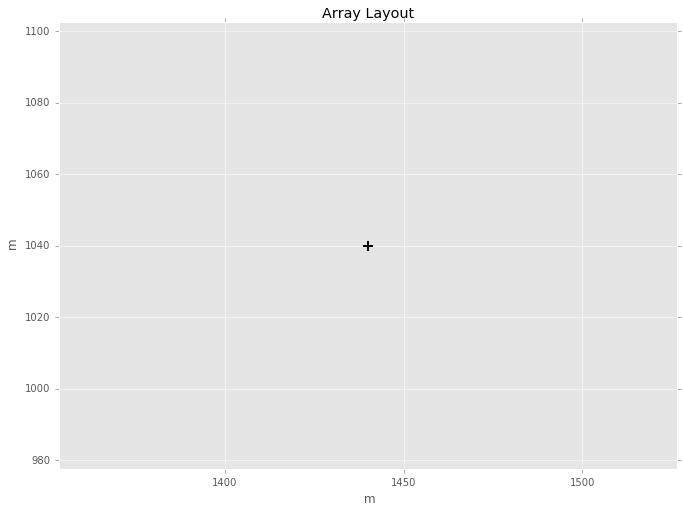

In [39]:
layout.plot(new_core, new_project)

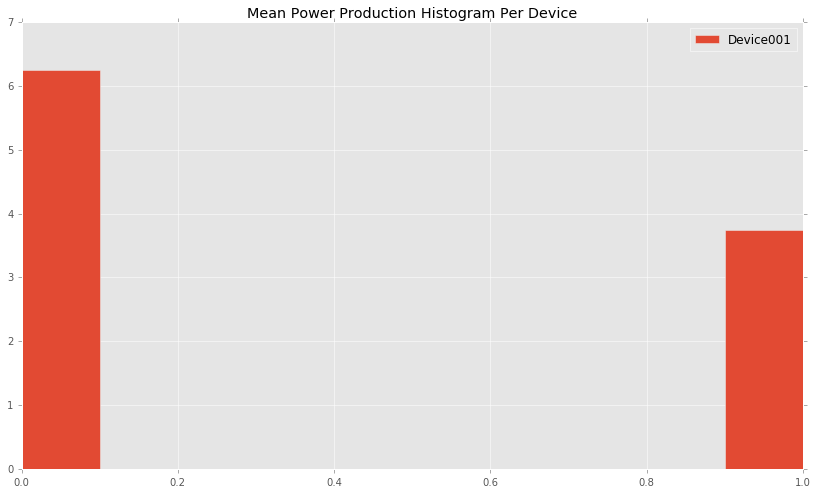

In [40]:
power_hist = electro_branch.get_input_variable(new_core, new_project, "farm.mean_power_hist_per_device")
power_hist.plot(new_core, new_project)

## Examine the Electrical Sub-systems results

Lets see what outputs are available from the modules.

In [41]:
electro_branch.inspect(new_core, new_project)

In [42]:
output_status = electro_branch.get_output_status(new_core, new_project)
message = html_dict(output_status)
HTML(message)

In [43]:
farm_annual_energy = electro_branch.get_output_variable(new_core, new_project, "farm.annual_energy")
meta_data = farm_annual_energy.get_metadata(new_core)
name = meta_data.title
value = farm_annual_energy.get_value(new_core, new_project)
units = meta_data.units[0]
message_two = "<p><b>{}:</b> <i>{}</i> ({})</p>".format(name, value, units)

HTML(message_two)

In [44]:
electrical_cost = electro_branch.get_output_variable(new_core, new_project,
                                                     "farm.electrical_economics_data")
                                            
cost_data = electrical_cost.get_value(new_core, new_project)

In [45]:
cost_data

,Cost,Key Identifier,Quantity,Year
0,600.0,1.0,10.0,0
1,700.0,2.0,1640.0,0
2,150000.0,11.0,1.0,0
3,150000.0,5.0,1.0,0
4,1000000.0,NaN,1.0,0


In [46]:
substations = electro_branch.get_output_variable(new_core, new_project,
                                                 "farm.substation_layout")

if substations.has_value(new_core, new_project): substations.get_value(new_core, new_project)

## Examine the Mooring and Foundations results

Lets see what outputs are available from the modules.

In [47]:
moorings_branch.inspect(new_core, new_project)

In [48]:
output_status = moorings_branch.get_output_status(new_core, new_project)
message = html_dict(output_status)
HTML(message)

## Examine Economics Results

In [49]:
output_status = eco_branch.get_output_status(new_core, new_project)
message = html_dict(output_status)
HTML(message)

In [50]:
lcoe = eco_branch.get_output_variable(new_core, new_project, "project.lcoe")
lcoe_capex = eco_branch.get_output_variable(new_core, new_project, "project.capex_lcoe")
total_cost = eco_branch.get_output_variable(new_core, new_project, "project.capex_total")
discount_energy = eco_branch.get_output_variable(new_core, new_project, "project.discounted_energy")
cost_breakdown = eco_branch.get_output_variable(new_core, new_project, "project.capex_breakdown")

In [51]:
message_lcoe = html_variable(new_core, new_project, lcoe)
message_cost = html_variable(new_core, new_project, total_cost)
message_energy = html_variable(new_core, new_project, discount_energy)
message = "<p>{}</p><p>{}</p><p>{}</p>".format(message_lcoe, message_cost, message_energy)
HTML(message)

## Plot the balance of CAPEX costs

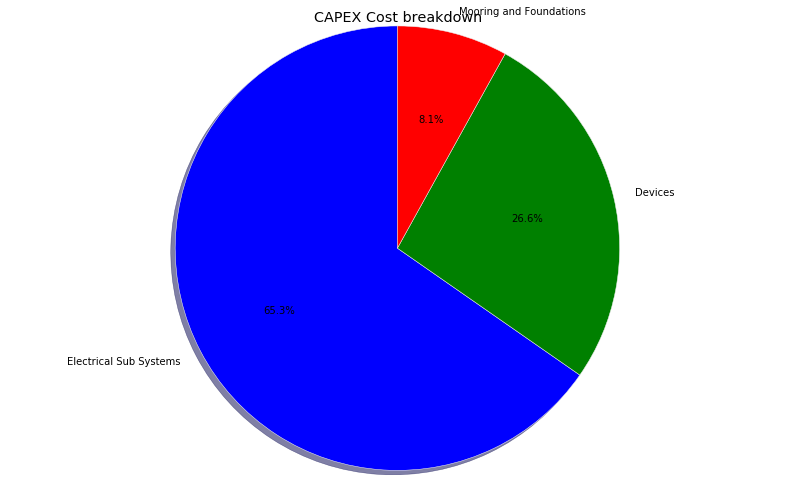

In [52]:
# The slices will be ordered and plotted counter-clockwise.
cost_data = cost_breakdown.get_value(new_core, new_project)
labels = cost_data.keys()
sizes = cost_data.values()
metadata = cost_breakdown.get_metadata(new_core)
colors = ['lightblue', 'hotpink']

plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title(metadata.title)

plt.show()

# HTML in matplotlib?

In [53]:
msg = html_dict(cost_data)
HTML(msg)

## Examine Environmental Results

In [54]:
output_status = env_branch.get_output_status(new_core, new_project)
message = html_dict(output_status)
HTML(message)

In [55]:
elec_confidence = env_branch.get_output_variable(new_core, new_project, "farm.elec_confidence")
elec_confidence.get_value(new_core,new_project)

{'Collision Risk': 3,
 'Electric Fields': 2,
 'Footprint': 2,
 'Magnetic Fields': 2,
 'Reef Effect': 3,
 'Reserve Effect': 3,
 'Resting Place': 3,
 'Temperature Modification': 2,
 'Underwater Noise': 2}